In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

data = pd.read_csv('AirPassengers.csv')
print(data.head())
print ('\n Data Types:')
print(data.dtypes)


     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

 Data Types:
Month         object
Passengers     int64
dtype: object


In [2]:

#Create dates for analysis, we only have the month and year
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
#################################################
#parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
#index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.
#date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.
###############################################
print(data.head())
#print(data.index)



            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


<ipython-input-2-5b042c9cc045>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: Passengers, dtype: int64
112
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


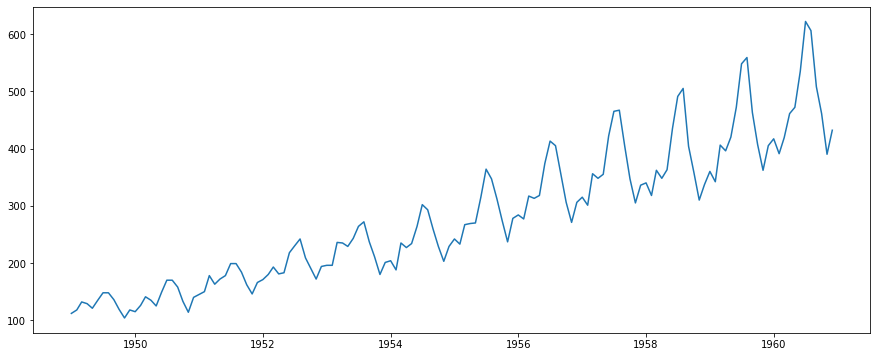

In [3]:

#1. Specific the index as a string constant:

#print(data['Passengers'])
ts = data['Passengers']
print(ts.head(10))

print(ts['1949-01-01'])

#1. Specify the entire range:
print(ts['1949-01-01':'1949-05-01'])
#Unlike numeric indexing, the end index is included here. For instance, if we index a list as a[:5] then it would return the values at indices – [0,1,2,3,4]. But here the index ‘1949-05-01’ was included in the output.
#The indices have to be sorted for ranges to work. If you randomly shuffle the index, this won’t work

#Consider another instance where you need all the values of the year 1949. This can be done as:
print(ts['1949'])
#Visualize the dataset
plt.plot(ts)
plt.show()


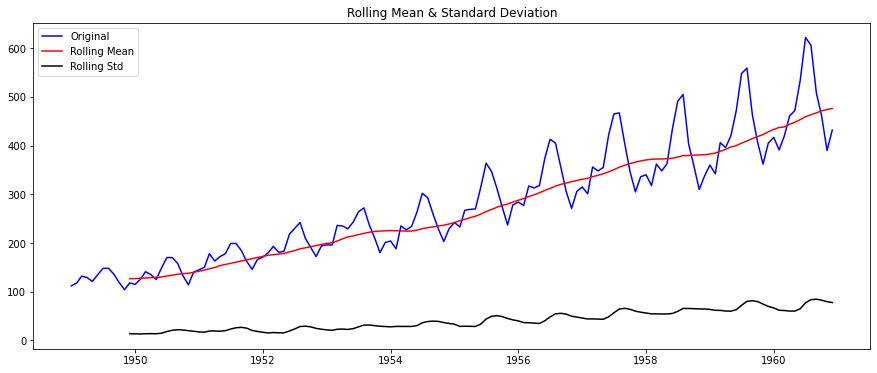

In [4]:

#############################################
#Identify if data is stationary
#Stationarity is defined using very strict criterion.
#However, for practical purposes we can assume the series to be
#stationary if it has constant statistical properties over time,
#ie. the following:

#constant mean
#constant variance
#an autocovariance that does not depend on time.
#Determing rolling statistics
#rolmean = pd.rolling_mean(ts, window=12)

rolmean = ts.rolling(window=12).mean()

rolstd = ts.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


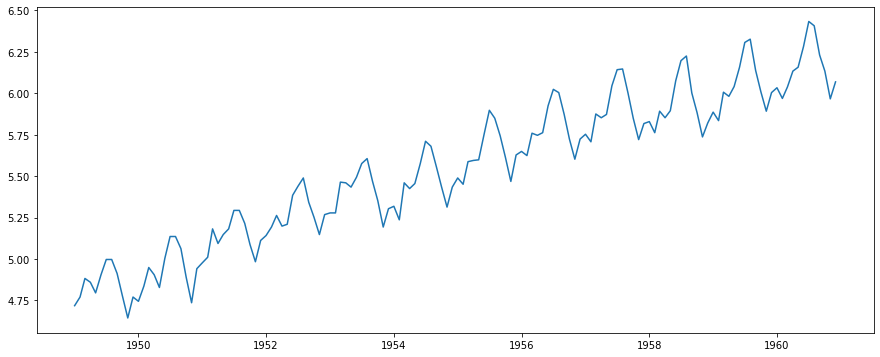

In [5]:
#One of the first tricks to reduce trend can be transformation.
#For example, in this case we can clearly see that the there is a
#significant positive trend. So we can apply transformation which
#penalize higher values more than smaller values.
#These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()


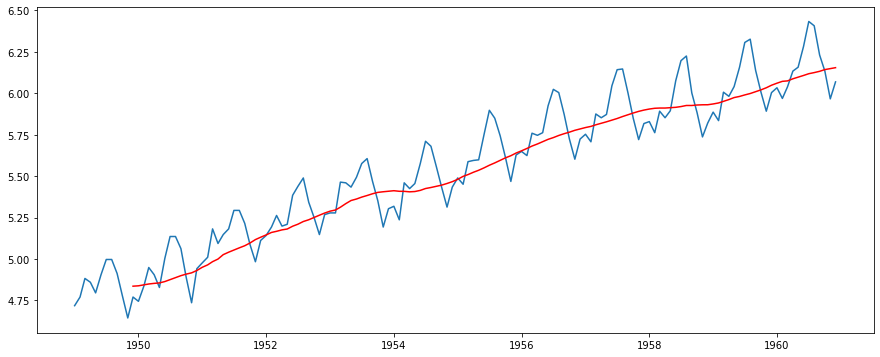

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: Passengers, dtype: float64


In [6]:

#Smoothing - Remove the rolling mean at any point
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()
#Since we use moving avg for 12 monthsm it is not applicable for first 11 minths
ts_log_moving_avg_diff = ts_log - moving_avg
print(ts_log_moving_avg_diff.head(12))
#Dropping NAN predicted_values


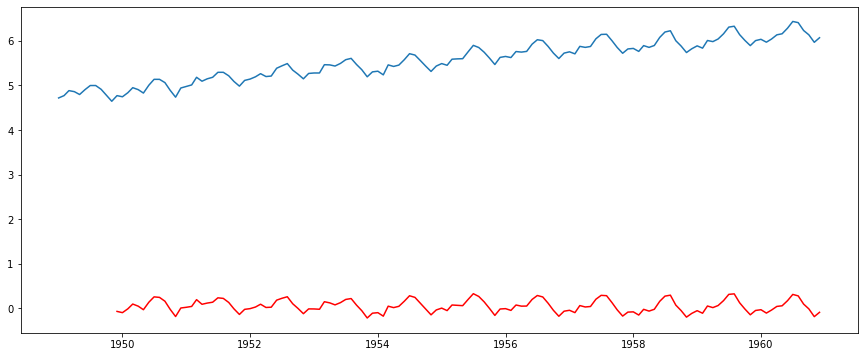

'\nfrom statsmodels.tsa.holtwinters import SimpleExpSmoothing\n# prepare data\ndata = ts_log\n# create class\nmodel = SimpleExpSmoothing(data)\n'

In [7]:

ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log)
plt.plot(ts_log_moving_avg_diff, color='red')
plt.show()
'''
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# prepare data
data = ts_log
# create class
model = SimpleExpSmoothing(data)
'''


/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


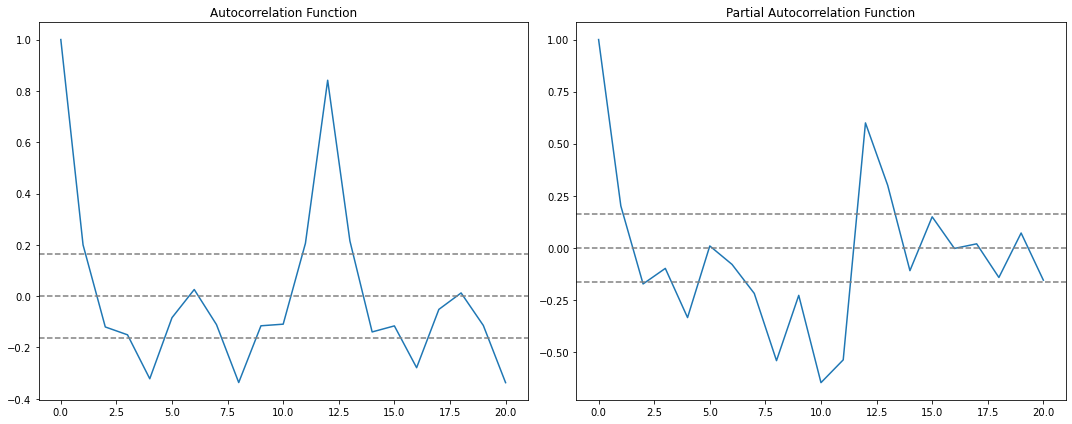

In [8]:

#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)


lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()




/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

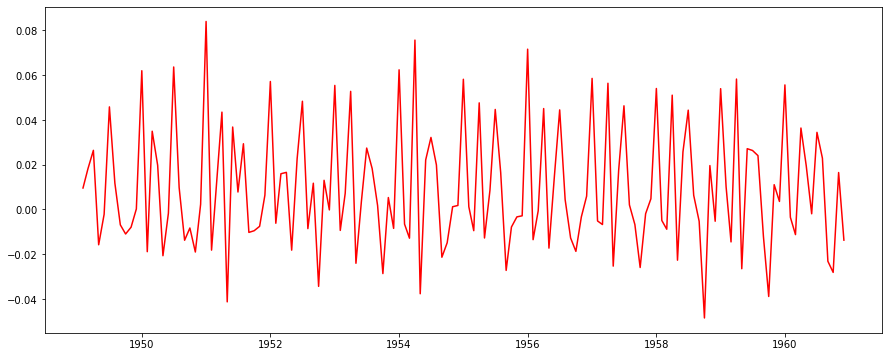

In [9]:


from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))

results_AR = model.fit(disp=-1)
#plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

plt.show()